# CUSTOMER CHURN PROBLEM

# Business problem

Business problem is very simple, There is a Bank who wants to retain their existing customers who may churn, for that they have to know which existing customers has the highest probability of leaving the company.

# Constraints

1.Low Latency(In Real time within in few nano seconds the model should be able to classify that Costomer will leave bank or not )

2.Errors can be very costly, customer can leave bank immediately.

3.Interpretablity is important.

4.Probablity of a particular customer belonging to each class is needed.

# Data

We have 10000 rows with 13 features and 1 target variable, Every row tells us different customer details and whether they churned or not after 2 months of observation.

# PERFORMANCE METRIC

It is a simple classification problem.

Other than that we will use accuracy(after checking if data is balanced or not), here the important thing is we care equally about Precision and Recall because we care equally about False Positives and False Negatives.

# Example

Let's say we have a case when actually customer is going to leave bank(churn) at that moment and model predicted it to be not leaving(no churn), here bank will not give time to that customer and after some time customer will leave the bank(churned) and bank won't be happy with the model and bank might not use it afterwards. This is a case of False Positive.

# Machine Learning Problem

So Converting a Business problem to a Machine Learning problem, This seems to be a simple binary classification problem in which we have 2 classes, "yes" and "no".

We have some numerical features, some categorical features.

In [1]:
#Importing Every library we need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
#Reading CSV file using pandas 
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
#Reading top 5 rows from dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Getting info about geography feature
df['Geography'].describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [5]:
#Getting info about whole dataframe using describe function
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#Getting info about whole dataframe using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
#Printing Whole Dataframe
print(display(df))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


None


In [11]:
print('Number of data points : ', df.shape[0])#Getting info how many rows are there
print('Number of features : ', df.shape[1])#Getting info how many Columns are there
print('Features : ', df.columns.values)#Getting info about columns names

Number of data points :  10000
Number of features :  14
Features :  ['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']


In [9]:
#Finding if there any null value present in our Data
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Finding is there any duplicate values present in our data
duplicate = df[df.duplicated()]
duplicate

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# OBSERVATON

0    7963
1    2037
Name: Exited, dtype: int64


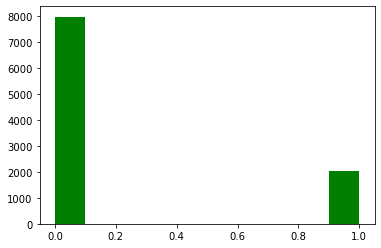

In [12]:
#Exited is our Label Column
#Lets see if there is class imbalace or not

print(df['Exited'].value_counts())#Value count of Exited or not
plt.hist(df['Exited'], facecolor='g')#creating histogram to see imbalance between data
plt.show()

From Histogram we can see that the data is imbalanced

In [16]:
#Getting Percentage of not Exited 
a=7963/df.shape[0]*100 #nochurn
#Getting Percentage of Exited 
b=2037/df.shape[0]*100 #churn
print("Percenatage of Sell in data " +str(a)+"%")
print("Percenatage of Buy in data " +str(b)+"%")

Percenatage of Sell in data 79.63%
Percenatage of Buy in data 20.369999999999997%


# Imbalanced Data

It seems that data is Imbalanced. because count of exited(1) is 2037 and 

count of Non_Exited(0) is 7963

# Exploratory data analysis/ Data Visualization

This will include-

1. univariate analysis(histograms/bar plots/ pdf/cdf/box plots/violin plots)

2. bivariate analysis(scatter plots and pair plots)

There are 13 features so we also need to see which features are not at all helping in classification. we surely know that CustomerId is of no use

Male      5457
Female    4543
Name: Gender, dtype: int64


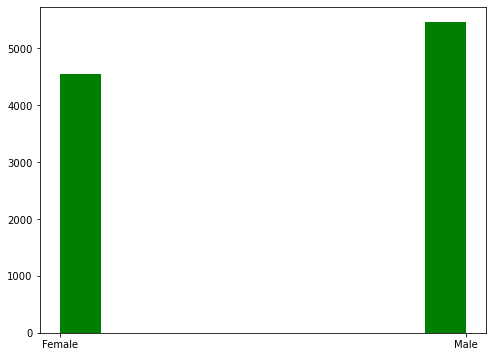

In [13]:
gender_count=df['Gender'].value_counts()#Value count of Exited or not
print(gender_count)

plt.figure(figsize=(8,6))
plt.hist(df['Gender'],facecolor='g')#creating histogram to see data
plt.show()

In [4]:
df[['Gender','Exited']].groupby('Gender').mean()#seeing how many feamle and male are exited

,Exited
Gender,
Female,0.250715
Male,0.164559


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


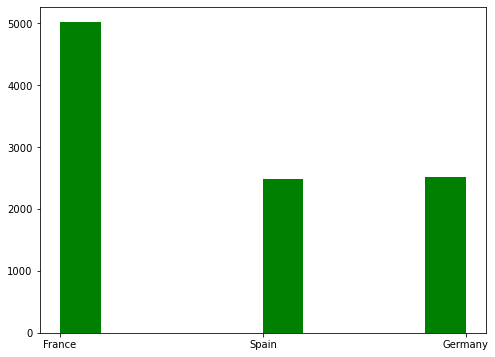

             Exited
Geography          
France     0.161548
Germany    0.324432
Spain      0.166734


In [14]:
#1 variable is Geography
count=df['Geography'].value_counts()#Value count of Geography
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['Geography'],facecolor='g')#creating histogram to see data
plt.show()


print(df[['Geography', 'Exited']].groupby('Geography').mean())#seeing how many are exited from where

From above we can see that which countrys cutstomers are more

Male      5457
Female    4543
Name: Gender, dtype: int64


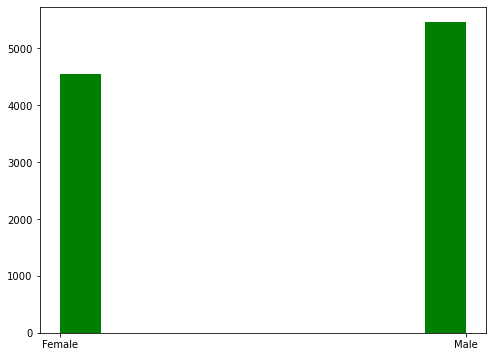

          Exited
Gender          
Female  0.250715
Male    0.164559


In [20]:
#2 variable is Gender
count=df['Gender'].value_counts()#Value count of Gender
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['Gender'],facecolor='g')#creating histogram to see data
plt.show()


print(df[['Gender', 'Exited']].groupby('Gender').mean())#seeing how many feamle and male are exited

We can see that which gender customers are more male or female

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


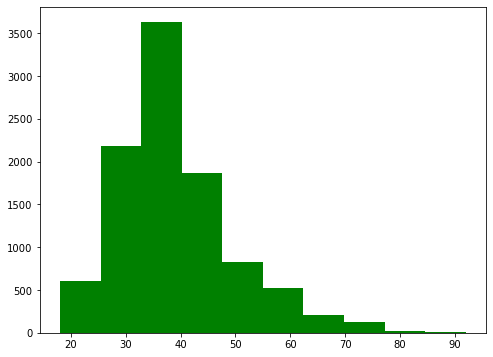

       Exited
Age          
18   0.090909
19   0.037037
20   0.050000
21   0.056604
22   0.142857
..        ...
83   0.000000
84   0.500000
85   0.000000
88   0.000000
92   0.000000

[70 rows x 1 columns]


In [19]:
#3 variable is Age
count=df['Age'].value_counts()#Value count of Age
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['Age'],facecolor='g')#creating histogram to see data
plt.show()


print(df[['Age', 'Exited']].groupby('Age').mean())#seeing from which age more customers are exited

We can see that which age customers are more

1    7055
0    2945
Name: HasCrCard, dtype: int64


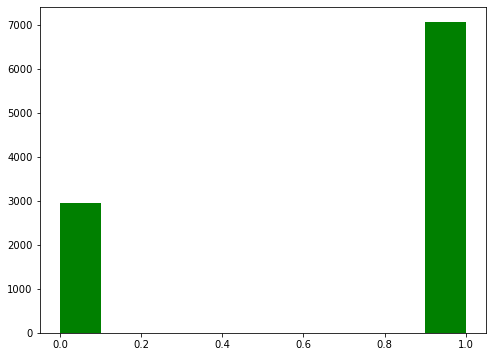

             Exited
HasCrCard          
0          0.208149
1          0.201843


In [24]:
#4 variable is HasCrCard
count=df['HasCrCard'].value_counts()#Value count of HasCrCard
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['HasCrCard'],facecolor='g')#creating histogram to see data
plt.show()


print(df[['HasCrCard', 'Exited']].groupby('HasCrCard').mean())#seeing how many Customers are exited who has credit card

We can see that how many customers have credit cards 

1    5151
0    4849
Name: IsActiveMember, dtype: int64


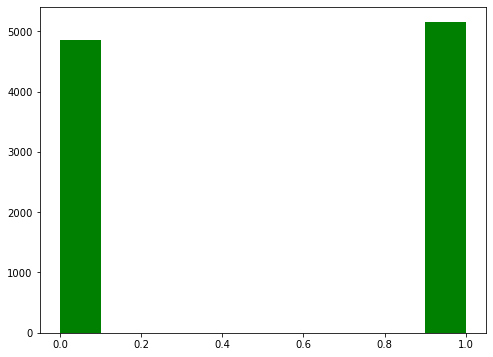

                  Exited
IsActiveMember          
0               0.268509
1               0.142691


In [27]:
#5 variable is IsActiveMember
count=df['IsActiveMember'].value_counts()#Value count of IsActivateMember
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['IsActiveMember'],facecolor='g')#creating histogram to see data
plt.show()


print(df[['IsActiveMember', 'Exited']].groupby('IsActiveMember').mean())#seeing how many Customers are exited which was Activate

We can see that how many customers are active

# Conlusion

For Categorical Features

We can see that age and isactivemember feature is overlapping and we can't say by looking at that data, but there is difference
in data of geography, gender and hascrcard.

# Numerical Features

mean:  5.0128
median:  5.0
no churn at 25 percentile: 3.0
no churn at 75 percentile: 7.0
churn at 25 percentile 2.0
churn at 75 percentile 8.0


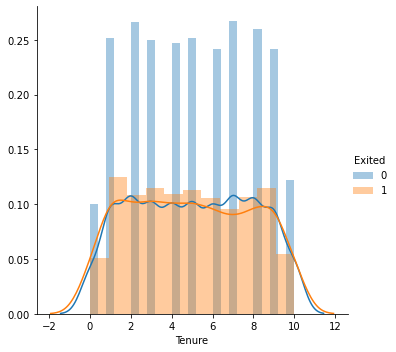

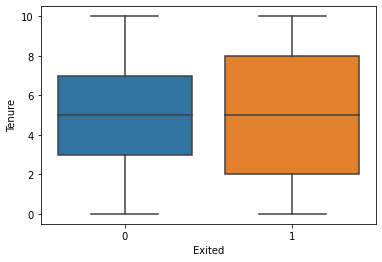

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

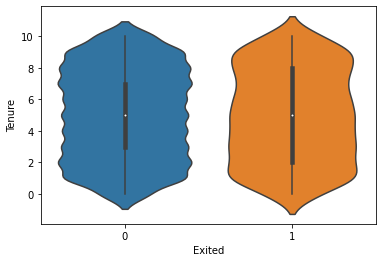

In [25]:
#1 numerical feature Tenure
a=np.mean(df.Tenure)#Finding mean of Tenure Series
print('mean: ',a)
b=np.median(df.Tenure)#Finding median of Tenure Series
print('median: ',b)

# 0 = Not Exited
# 1 = Exited

sa=df.loc[df['Exited']==0]#Taking all Exited values in sa variable
sb=df.loc[df['Exited']==1]#Taking all not Exited values in sb variable

c=np.percentile(sa['Tenure'],25)#Finding 25th Percentile value of exited for Tenure 
print('no churn at 25 percentile:',c)

c1=np.percentile(sa['Tenure'],75)#Finding 75th Percentile value of exited for Tenure
print('no churn at 75 percentile:',c1)

d=np.percentile(sb['Tenure'],25)#Finding 25th Percentile value of not exited for Tenure
print('churn at 25 percentile',d)

e=np.percentile(sb['Tenure'],75)#Finding 75th Percentile value of not exited for Tenure
print('churn at 75 percentile',e)

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Tenure",kde='True') \
   .add_legend()
plt.show()                                  #Histogram

sns.boxplot(x='Exited',y='Tenure', data=df) # BoxPlot
plt.show()

sns.violinplot(x='Exited',y='Tenure', data=df) #ViolinPlot

first plot is simple pdf, and by pdfs we can clearly observe that customers are churning at point and it is continous but there are less churning at high tenure.

second plot is box plot, we can see that both classes are overlapping, we cant say at what point customers are churning.

last plot is of violin plot(combination of box plot and pdf's), classes in this class are also overlapping.

mean:  100090.2398809998
median:  100193.915
no churn at 25 percentile: 50783.49
no churn at 75 percentile: 148609.95500000002
churn at 25 percentile 51907.72
churn at 75 percentile 152422.91


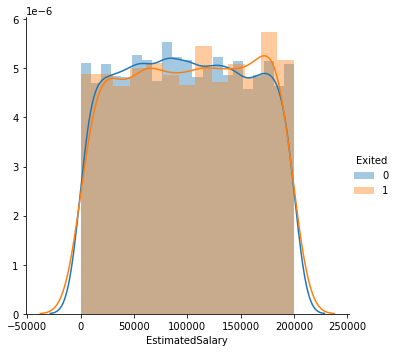

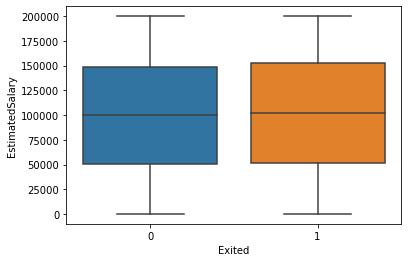

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

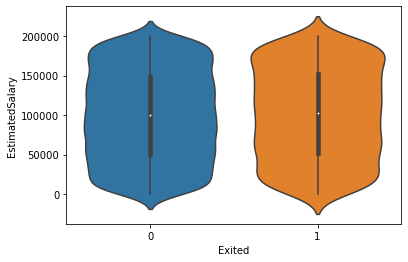

In [27]:
#2 numerical feature EstimatedSalary
a=np.mean(df.EstimatedSalary)
print('mean: ',a)
b=np.median(df.EstimatedSalary)
print('median: ',b)

# 0 = Not Exited
# 1 = Exited

sa=df.loc[df['Exited']==0]#Taking all Exited values in sa variable
sb=df.loc[df['Exited']==1]#Taking all not Exited values in sb variable

c=np.percentile(sa['EstimatedSalary'],25)#Finding 25th Percentile value of exited for EstimatedSalary 
print('no churn at 25 percentile:',c)

c1=np.percentile(sa['EstimatedSalary'],75)#Finding 75th Percentile value of exited for EstimatedSalary
print('no churn at 75 percentile:',c1)

d=np.percentile(sb['EstimatedSalary'],25)#Finding 25th Percentile value of not exited for EstimatedSalary
print('churn at 25 percentile',d)

e=np.percentile(sb['EstimatedSalary'],75)#Finding 75th Percentile value of not exited for EstimatedSalary
print('churn at 75 percentile',e)

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "EstimatedSalary",kde='True') \
   .add_legend()
plt.show()                                            #Histogram

sns.boxplot(x='Exited',y='EstimatedSalary', data=df) # BoxPlot
plt.show()

sns.violinplot(x='Exited',y='EstimatedSalary', data=df) #ViolinPlot

first plot is simple pdf, and by pdfs we can clearly observe that Both classes are overlapping and we cant say at which point customers are churning.

second plot is box plot, we can see that both classes are overlapping, we cant say at what point customers are churning.

last plot is of violin plot(combination of box plot and pdf's), classes in this class are also overlapping.

mean:  650.5288
median:  652.0
no churn at 25 percentile: 585.0
no churn at 75 percentile: 718.0
churn at 25 percentile 578.0
churn at 75 percentile 716.0


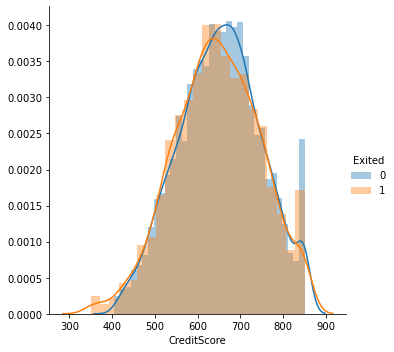

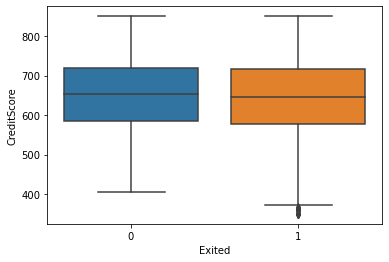

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

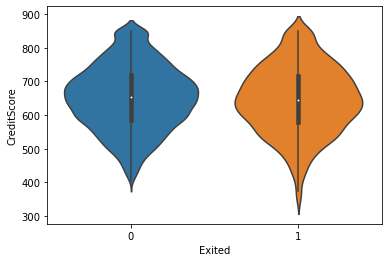

In [28]:
#3 numerical feature CreditScore
a=np.mean(df.CreditScore)
print('mean: ',a)
b=np.median(df.CreditScore)
print('median: ',b)

# 0 = Not Exited
# 1 = Exited

sa=df.loc[df['Exited']==0]#Taking all Exited values in sa variable
sb=df.loc[df['Exited']==1]#Taking all not Exited values in sb variable

c=np.percentile(sa['CreditScore'],25)#Finding 25th Percentile value of exited for CreditScore 
print('no churn at 25 percentile:',c)

c1=np.percentile(sa['CreditScore'],75)#Finding 75th Percentile value of exited for CreditScore
print('no churn at 75 percentile:',c1)

d=np.percentile(sb['CreditScore'],25)#Finding 25th Percentile value of not exited for CreditScore
print('churn at 25 percentile',d)

e=np.percentile(sb['CreditScore'],75)#Finding 75th Percentile value of not exited for CreditScore
print('churn at 75 percentile',e)

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "CreditScore",kde='True') \
   .add_legend()
plt.show()                                            #Histogram

sns.boxplot(x='Exited',y='CreditScore', data=df) # BoxPlot
plt.show()

sns.violinplot(x='Exited',y='CreditScore', data=df) #ViolinPlot

first plot is simple pdf, and by pdfs we can clearly observe that Both classes are overlapping and we cant say at which point customers are churning.

second plot is box plot, we can see that both classes are overlapping, we cant say at what point customers are churning.

last plot is of violin plot(combination of box plot and pdf's), classes in this class are also overlapping.

mean:  76485.88928799961
median:  97198.54000000001
no churn at 25 percentile: 0.0
no churn at 75 percentile: 126410.28
churn at 25 percentile 38340.02
churn at 75 percentile 131433.33


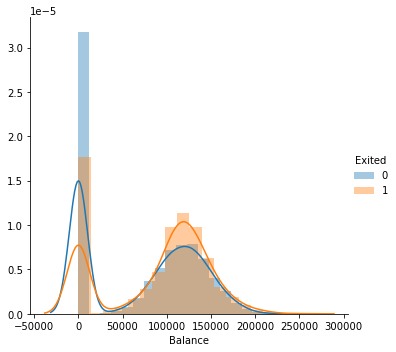

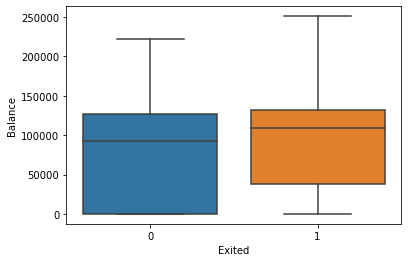

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

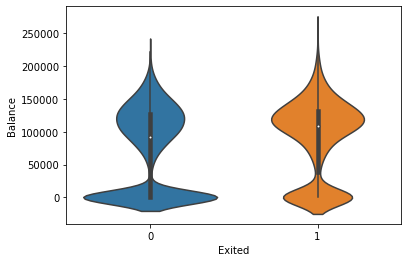

In [29]:
#4 numerical feature Balance
a=np.mean(df.Balance)
print('mean: ',a)
b=np.median(df.Balance)
print('median: ',b)

# 0 = Not Exited
# 1 = Exited

sa=df.loc[df['Exited']==0]#Taking all Exited values in sa variable
sb=df.loc[df['Exited']==1]#Taking all not Exited values in sb variable

c=np.percentile(sa['Balance'],25)#Finding 25th Percentile value of exited for Balance
print('no churn at 25 percentile:',c)

c1=np.percentile(sa['Balance'],75)#Finding 75th Percentile value of exited for Balance
print('no churn at 75 percentile:',c1)

d=np.percentile(sb['Balance'],25)#Finding 25th Percentile value of not exited for Balance
print('churn at 25 percentile',d)

e=np.percentile(sb['Balance'],75)#Finding 75th Percentile value of not exited for Balance
print('churn at 75 percentile',e)

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Balance",kde='True') \
   .add_legend()
plt.show()                                    #Histogram

sns.boxplot(x='Exited',y='Balance', data=df) # BoxPlot
plt.show()

sns.violinplot(x='Exited',y='Balance', data=df) #ViolinPlot

first plot is simple pdf, and by pdfs we can clearly observe that mostly both classes are overlapping but when balance is low customers ae stayed but when balance is increased most customers are churned.

second plot is box plot, we can see that when balance is low most customers are stayedand when balance is increased customers are churned.

last plot is of violin plot(combination of box plot and pdf's), when balance is low most customers are stayedand when balance is increased customers are churned.

mean:  1.5302
median:  1.0
no churn at 25 percentile: 1.0
no churn at 75 percentile: 2.0
churn at 25 percentile 1.0
churn at 75 percentile 2.0


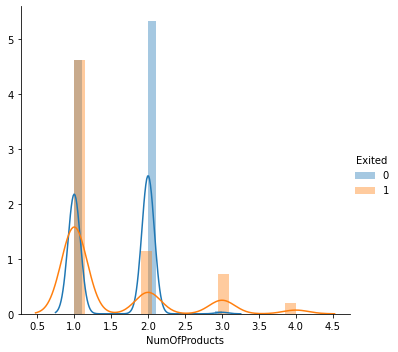

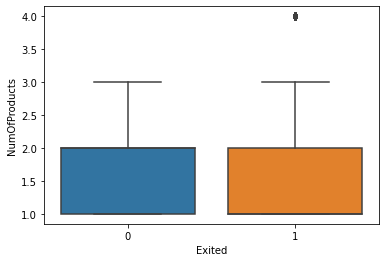

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

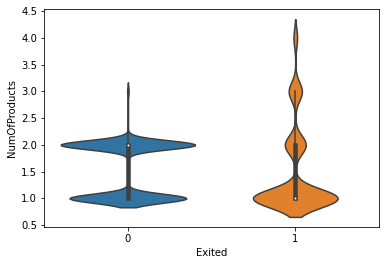

In [30]:
#5 numerical feature NumOfProducts
a=np.mean(df.NumOfProducts)
print('mean: ',a)
b=np.median(df.NumOfProducts)
print('median: ',b)

# 0 = Not Exited
# 1 = Exited

sa=df.loc[df['Exited']==0]#Taking all Exited values in sa variable
sb=df.loc[df['Exited']==1]#Taking all not Exited values in sb variable

c=np.percentile(sa['NumOfProducts'],25)#Finding 25th Percentile value of exited for NumOfProducts 
print('no churn at 25 percentile:',c)

c1=np.percentile(sa['NumOfProducts'],75)#Finding 75th Percentile value of exited for NumOfProducts
print('no churn at 75 percentile:',c1)

d=np.percentile(sb['NumOfProducts'],25)#Finding 25th Percentile value of not exited for NumOfProducts
print('churn at 25 percentile',d)

e=np.percentile(sb['NumOfProducts'],75)#Finding 75th Percentile value of not exited for NumOfProducts
print('churn at 75 percentile',e)

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "NumOfProducts",kde='True') \
   .add_legend()
plt.show()                                           #Histogram

sns.boxplot(x='Exited',y='NumOfProducts', data=df) # BoxPlot
plt.show()

sns.violinplot(x='Exited',y='NumOfProducts', data=df) #ViolinPlot

first plot is simple pdf, and by pdfs we can clearly observe that mostly both classes are overlapping at starting when product is count is low(1) but when product count increases and get to medium(2) count then most customers are stayed and when product count increases more then customers are churning. 

second plot is box plot, we can see that from box plot we cant say that much because it is overlapping.

last plot is of violin plot(combination of box plot and pdf's), we can clearly observe that mostly both classes are overlapping at starting when product is count is low(1) but when product count increases and get to medium(2) count then most customers are stayed and when product count increases more then customers are churning.

In [48]:
df['Exited'].value_counts() #Count values of Exited and not Exited values

0    7963
1    2037
Name: Exited, dtype: int64

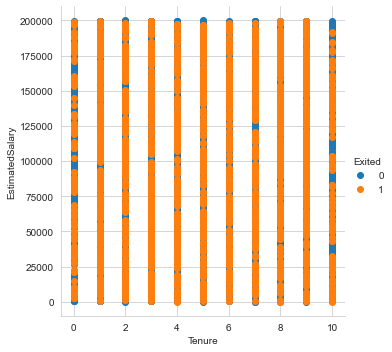

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(plt.scatter, "Tenure", "EstimatedSalary") \
   .add_legend();
plt.show()                  #Scatterplot

# Conclusion

For Numerical Features
1) First plot is the pdf for feature 'Tenure','EstimatedSalary','CreditScore','Balance','NumOfProducts' we can see,there is difference between classes and almost all features are overlapping.

2) Second plot is the box plot, from box plot also we can see that what are the 25th, 50th and 75th Percentile.

3) Third plot is violin plot, it is giving us individual class label distribution and percentiles associated with that class label, from violin plot it is difficult to come up with any conclusion.

In [4]:
categorical = ['Geography','Gender']#Convert Categorical features into Numerical Features

#inserting converted columns in 'X' dataframe and using drop_first method
X = pd.get_dummies(df, columns=categorical, drop_first=True) 

In [34]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [35]:
X

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [5]:
scaling = MinMaxScaler()#Using minmaxscaler for scaling
#Scaling Balance,EstimatedSalary,Tenure,CreditScore
ba = scaling.fit_transform(df[['Balance']])
mc = scaling.fit_transform(df[['EstimatedSalary']])
ten = scaling.fit_transform(df[['Tenure']])
cs = scaling.fit_transform(df[['CreditScore']])
#Replacing Scaled features in Dataframe
X['Balance'] = ba
X['EstimatedSalary'] = mc
X['Tenure'] = ten
X['CreditScore'] = cs

In [23]:
X.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,0.538,42,0.2,0.000000,1,1,1,0.506735,1,0,0,0
1,2,15647311,Hill,0.516,41,0.1,0.334031,1,0,1,0.562709,0,0,1,0
2,3,15619304,Onio,0.304,42,0.8,0.636357,3,1,0,0.569654,1,0,0,0
3,4,15701354,Boni,0.698,39,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,5,15737888,Mitchell,1.000,43,0.2,0.500246,1,1,1,0.395400,0,0,1,0
5,6,15574012,Chu,0.590,44,0.8,0.453394,2,1,0,0.748797,1,0,1,1
6,7,15592531,Bartlett,0.944,50,0.7,0.000000,2,1,1,0.050261,0,0,0,1
7,8,15656148,Obinna,0.052,29,0.4,0.458540,4,1,0,0.596733,1,1,0,0
8,9,15792365,He,0.302,44,0.4,0.566170,2,0,1,0.374680,0,0,0,1
9,10,15592389,H?,0.668,27,0.2,0.536488,1,1,1,0.358605,0,0,0,1


In [6]:
#Removing non needing features from dataframe
x2=X.drop(['Exited','Surname','CustomerId','RowNumber'],axis=1)
#seperating lable column 
y2=X['Exited']
x2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,42,0.2,0.000000,1,1,1,0.506735,0,0,0
1,0.516,41,0.1,0.334031,1,0,1,0.562709,0,1,0
2,0.304,42,0.8,0.636357,3,1,0,0.569654,0,0,0
3,0.698,39,0.1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,43,0.2,0.500246,1,1,1,0.395400,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,0.5,0.000000,2,1,0,0.481341,0,0,1
9996,0.332,35,1.0,0.228657,1,1,1,0.508490,0,0,1
9997,0.718,36,0.7,0.000000,1,0,1,0.210390,0,0,0
9998,0.844,42,0.3,0.299226,2,1,0,0.464429,1,0,1


# MODEL TRAINING, EVALUATION AND HYPERPARAMETER TUNING

# KNN(K-Nearest Neighbor)


In [54]:

#Importing KNeighborsClassifier function from sklearn library
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier

#Using RandomOverSampler for oversampling
o_sample = RandomOverSampler(random_state=0)
#Oversampling features and lables
x_Osample,y_Osample = o_sample.fit_resample(x2,y2)

tuned_parameters=[{'n_neighbors':[3,4,5,6,7,8,9]}]#Giving Hyper-Parameters

#Splitting train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_Osample, y_Osample, test_size = 0.3, random_state=50)

# Assign KNeighborsClassifier to clf variable
clf= KNeighborsClassifier()

#Using Gridsearch Method(GridSearchCV) to find best hyper-Parameter
modelknn=GridSearchCV(clf,tuned_parameters,scoring='accuracy')

#Giving training data to train our model
modelknn.fit(x_train,y_train)

#Finding best Hyper-Parameter
print(modelknn.best_estimator_)

#Finding accuracy on test data
print('\nAccuracy on Testing data:',modelknn.score(x_test,y_test))
print('Accuracy on Training data:',modelknn.score(x_train,y_train))

#assigning predictions of test data to knn_test_prediction
knn_test_prediction=modelknn.predict(x_test)

#assigning predictions of train data to knn_train_predictions
knn_train_predictions=modelknn.predict(x_train)



#Finding f1 score of test data
X_knntest_F1score=f1_score(y_test,knn_test_prediction,average='weighted')
print("\nF1 score on Testing data",X_knntest_F1score) 
#Finding f1 score of train data
X_knntrain_F1score=f1_score(y_train,knn_train_predictions,average='weighted')
print("F1 score on Training data:",X_knntrain_F1score) 

#Finding Precision for test data
print('\nPrecision on Testing data:', precision_score(y_test, knn_test_prediction))
#Finding Precision for train data
print('Precision on Training data:', precision_score(y_train, knn_train_predictions))

#Finding Recall for test data
print('\nRecall on Testing data:', recall_score(y_test, knn_test_prediction))
#Finding Precision for train data
print('Recall on Training data:', recall_score(y_train, knn_train_predictions))

#Finding Confusion Matrix for test data
print('\nConfusion Matrix on Testing data:\n',confusion_matrix(y_test, knn_test_prediction))
#Finding Confusion Matrix for train data
print('Confusion Matrix on Training data:\n',confusion_matrix(y_train, knn_train_predictions))

KNeighborsClassifier(n_neighbors=3)

Accuracy on Testing data: 0.8369610715780661
Accuracy on Training data: 0.9217796914244708

F1 score on Testing data 0.8362079768113861
F1 score on Training data: 0.921536242027012

Precision on Testing data: 0.7976409878363435
Precision on Training data: 0.8790960451977401

Recall on Testing data: 0.9039264828738512
Recall on Training data: 0.9779134494523254

Confusion Matrix on Testing data:
 [[1835  549]
 [ 230 2164]]
Confusion Matrix on Training data:
 [[4830  749]
 [ 123 5446]]


# KNN Observation

1. Knn is giving us very good results, we are getting around 83% f1 score on test data when we used Oversampling.

# Logistic Regression


In [50]:
#oversampling
#Importing  LogisticRegression function from sklearn library
from sklearn.linear_model import LogisticRegression

#Using RandomOverSampler for oversampling
o_sample = RandomOverSampler(random_state=0)
#Oversampling features and lables
x_Osample,y_Osample = o_sample.fit_resample(x2,y2)

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}] # Giving Hyper-Parameters(10^4,10^2,10^0,1/10^2,1/10^4)

#Splitting train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_Osample, y_Osample, test_size = 0.3, random_state=50)

# Assign LogisticRegression to LRmodel variable and Using Gridsearch Method(GridSearchCV) to find best hyper-parameter
LRmodel=GridSearchCV(LogisticRegression(),tuned_parameters,scoring='accuracy')


#Giving training data to train our model
LRmodel.fit(x_train,y_train)

#Finding best Hyper-Parameter
print(LRmodel.best_estimator_)

#Finding accuracy on test data
print('\nAccuracy on Testing data:',LRmodel.score(x_test,y_test))
print('Accuracy on Training data:',LRmodel.score(x_train,y_train))


#assigning predictions of test data to LR_test_prediction
LR_test_prediction=LRmodel.predict(x_test)

#assigning predictions of train data to LR_train_predictions
LR_train_predictions=LRmodel.predict(x_train)


#Finding f1 score of test data
X_lrtest_F1score=f1_score(y_test,LR_test_prediction)
print("\nF1 score on Testing data:",X_lrtest_F1score) 
#Finding f1 score of train data
X_lrtrain_F1score=f1_score(y_train,LR_train_predictions)
print("F1 score on Training data:",X_lrtrain_F1score) 

#Finding Precision for test data
print('\nPrecision on Testing data:', precision_score(y_test, LR_test_prediction))
#Finding Precision for train data
print('Precision on Training data:', precision_score(y_train, LR_train_predictions))

#Finding Recall for test data
print('\nRecall on Testing data:', recall_score(y_test, LR_test_prediction))
#Finding Recall for train data
print('Recall on Training data:', recall_score(y_train, LR_train_predictions))

#Finding Confusion Matrix for test data
print('\nConfusion Matrix on Testing data:\n',confusion_matrix(y_test, LR_test_prediction))
#Finding Confusion Matrix for train data
print('Confusion Matrix on Training data:\n',confusion_matrix(y_train, LR_train_predictions))

LogisticRegression(C=0.01)

Accuracy on Testing data: 0.7013394725826706
Accuracy on Training data: 0.7104413347685683

F1 score on Testing data: 0.6967056323060573
F1 score on Training data: 0.7037444933920705

Precision on Testing data: 0.7092167892687148
Precision on Training data: 0.7197296789938051

Recall on Testing data: 0.6846282372598163
Recall on Training data: 0.6884539414616627

Confusion Matrix on Testing data:
 [[1712  672]
 [ 755 1639]]
Confusion Matrix on Training data:
 [[4086 1493]
 [1735 3834]]


# LR Observation

1. LR is giving us good results, we are getting around 69% f1 score on test data when we used Oversampling.

# SVM(Support Vector Machine)


In [45]:
#Oversampling
#Importing  svm function from sklearn library
from sklearn import svm


#Using RandomOverSampler for oversampling
o_sample = RandomOverSampler(random_state=0)
#Oversampling features and lables
x_Osample,y_Osample = o_sample.fit_resample(x2,y2)


tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]#Giving Hyper-Parameters

#Splitting train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_Osample, y_Osample, test_size = 0.3, random_state=50)


# Assign svm to clf variable 
clf= svm.SVC(kernel='rbf')
# Using Gridsearch Method(GridSearchCV) to find best hyper-parameter
smodel=GridSearchCV(clf,tuned_parameters,scoring='accuracy')

#Giving training data to train our model
smodel.fit(x_train,y_train)

#Finding best Hyper-Parameter
print(smodel.best_estimator_)

#Finding accuracy on test data
print('\nAccuracy on Testing data:',smodel.score(x_test,y_test))
print('Accuracy on Training data:',smodel.score(x_train,y_train))

#assigning predictions of test data to svm_test_prediction
svm_test_prediction=smodel.predict(x_test)
#assigning predictions of train data to svm_test_prediction
svm_train_predictions=smodel.predict(x_train)

#Finding f1 score of test data
X_svmtest_F1score=f1_score(y_test,svm_test_prediction)
print("\nF1 score on Testing data:",X_svmtest_F1score) 

#Finding f1 score of train data
X_svmtrain_F1score=f1_score(y_train,svm_train_predictions)
print("F1 score on Training data:",X_svmtrain_F1score)

#Finding Precision of test data
print('\nPrecision on Testing data:', precision_score(y_test, svm_test_prediction))
#Finding Precision of train data
print('Precision on Training data:', precision_score(y_train, svm_train_predictions))

#Finding Recall of test data
print('\nRecall on Testing data:', recall_score(y_test, svm_test_prediction))
#Finding Recall of train data
print('Recall on Training data:', recall_score(y_train, svm_train_predictions))

#Finding Confusion Matrix of test data
print('\nConfusion Matrix on Testing data:\n',confusion_matrix(y_test, svm_test_prediction))
#Finding Confusion Matrix of train data
print('Confusion Matrix on Training data:\n',confusion_matrix(y_train, svm_train_predictions))

SVC(C=10)

Accuracy on Testing data: 0.7224780242779406
Accuracy on Training data: 0.7255113024757804

F1 score on Testing data 0.7112369337979095
F1 score on Training data 0.7138047138047139

Precision on Testing data: 0.7429481346678799
Precision on Training data: 0.7448760491899278

Recall on Testing data: 0.6821219715956558
Recall on Training data: 0.6852217633327348

Confusion Matrix on Testing data:
 [[1819  565]
 [ 761 1633]]
Confusion Matrix on Training data:
 [[4272 1307]
 [1753 3816]]


# SVM

1. SVM is giving us good results, we are getting around 71% f1 score on test data when we used Oversampling.

# Decision Tree

In [42]:
#Oversampling
#Importing  svm function from sklearn library
from sklearn import tree

#Using RandomOverSampler for oversampling
o_sample = RandomOverSampler(random_state=0)
#Oversampling features and lables
x_Osample,y_Osample = o_sample.fit_resample(x2,y2)


tuned_parameters=[{'max_depth':[5,8,10]}]#Giving Hyper-Parameters

#Splitting train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_Osample,y_Osample, test_size = 0.3, random_state=50)

# Assign DecisionTreeClassifier to clf variable 
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
# Using Gridsearch Method(GridSearchCV) to find best hyper-parameter
model=GridSearchCV(clf,tuned_parameters,scoring='accuracy')

#Giving training data to train our model
model.fit(x_train,y_train)


#Finding best Hyper-Parameter
print(model.best_estimator_)

#Finding accuracy on test data
print('\nAccuracy on Testing data:',model.score(x_test,y_test))
print('Accuracy on Training data:',model.score(x_train,y_train))

#assigning predictions of test data to DT_test_prediction
DT_test_prediction=model.predict(x_test)
#assigning predictions of train data to DT_train_predictions
DT_train_predictions=model.predict(x_train)

#Finding f1 score of test data
print('\nF1 score on testing data',model.score(x_test,y_test))
#Finding f1 score of train data
print('F1 score on training data',model.score(x_train,y_train))

#Finding Precision of test data
print('\nPrecision on testing data:', precision_score(y_test, DT_test_prediction))
#Finding Precision of train data
print('Precision on training data:', precision_score(y_train, DT_train_predictions))


#Finding Recall of test data
print('\nRecall on testing data:', recall_score(y_test, DT_test_prediction))
#Finding Recall of train data
print('Recall on training data:', recall_score(y_train, DT_train_predictions))


#Finding Confusion Matrix of test data
print('\nConfusion Matrix on testing data:\n',confusion_matrix(y_test, DT_test_prediction))
#Finding Confusion Matrix of train data
print('Confusion Matrix on training data:\n',confusion_matrix(y_train, DT_train_predictions))


DecisionTreeClassifier(max_depth=10, min_samples_split=5)

Accuracy on Testing data: 0.8166596902469653
Accuracy on Training data: 0.864908503767492

F1 score on testing data 0.8166596902469653
F1 score on training data 0.864908503767492

Precision on testing data: 0.7883738601823708
Precision on training data: 0.8406842193526748

Recall on testing data: 0.866750208855472
Recall on training data: 0.9001616089064464

Confusion Matrix on testing data:
 [[1827  557]
 [ 319 2075]]
Confusion Matrix on training data:
 [[4629  950]
 [ 556 5013]]


# DT

1. DT is giving us very good results, we are getting around 81% f1 score on test data when we used Oversampling.

# Random Forest


In [39]:
#Oversampling
#Importing  RandomForestClassifier function from sklearn library
from sklearn.ensemble import RandomForestClassifier

#n_estimators=No.of decision trees 
#max_depth=depth of a tree
param_grid = {
    'n_estimators': [200,300,500],
    'max_depth' : [4,5,6]
}

#Using RandomOverSampler for oversampling
o_sample = RandomOverSampler(random_state=0)
#Oversampling features and lables
x_Osample,y_Osample = o_sample.fit_resample(x2,y2)


#here parameter class_weight='balanced' will balance the class imbalances
#Splitting train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_Osample,y_Osample, test_size = 0.3, random_state=50)

# Assign RandomForestClassifier to rfc3 variable 
rfc3=RandomForestClassifier(class_weight='balanced', max_depth= 6, max_features= 'auto', 
                            n_estimators=300,random_state=42)

# Using Gridsearch Method(GridSearchCV) to find best hyper-parameter
grid_searchcw = GridSearchCV(estimator = rfc3, param_grid = param_grid, n_jobs = -1,scoring='accuracy')

#Giving training data to train our model
grid_searchcw.fit(x_train, y_train)
# random_forest_modelcw=rfc3.fit(x_train,y_train)

#Finding best max_depth and n_estimators
print(grid_searchcw.best_params_)
print(model.best_estimator_)

#Finding accuracy on test data
print('\nAccuracy on Testing data:',grid_searchcw.score(x_test,y_test))
print('Accuracy on Testing data:',grid_searchcw.score(x_train,y_train))


#assigning predictions of test data to X_test_predictcw
X_test_predictcw=random_forest_modelcw.predict(x_test)
#assigning predictions of train data to X_train_predictcw
X_train_predictcw=random_forest_modelcw.predict(x_train)


#Finding f1 score of test data
X_test_F1score=f1_score(y_test,X_test_predictcw,average='macro')
print("\nF1 score on testing data",X_test_F1score)
#Finding f1 score of train data
X_train_F1score=f1_score(y_train,X_train_predictcw,average='macro')
print("F1 score on training data",X_train_F1score) 

#Finding Precision of test data
print('\nPrecision on Testing data:', precision_score(y_test, X_test_predictcw))
#Finding Precision of training data
print('Precision on Training data:', precision_score(y_train, X_train_predictcw))

#Finding Recall of test data
print('\nRecall on Testing data:', recall_score(y_test, X_test_predictcw))
#Finding Recall of train data
print('Recall on Training data:', recall_score(y_train, X_train_predictcw))

#Finding Confusion Matrix of test data
print('\nConfusion Matrix on Testing data:\n',confusion_matrix(y_test, X_test_predictcw))
#Finding Confusion Matrix of training data
print('Confusion Matrix on Training data:\n',confusion_matrix(y_train, X_train_predictcw))

{'max_depth': 6, 'n_estimators': 300}
DecisionTreeClassifier(max_depth=5, min_samples_split=5)

Accuracy on Testing data: 0.7819171201339472
Accuracy on Testing data: 0.7970936490850377

F1 score on testing data 0.7874756918533252
F1 score on training data 0.7932393702039957

Precision on Testing data: 0.8130671506352087
Precision on Training data: 0.8154083799961382

Recall on Testing data: 0.7485380116959064
Recall on Training data: 0.7583049021368289

Confusion Matrix on Testing data:
 [[1972  412]
 [ 602 1792]]
Confusion Matrix on Training data:
 [[4623  956]
 [1346 4223]]


# RF

1. Knn is giving us good results, we are getting around 78% f1 score on test data when we used Oversampling.

# Pretty Table

In [3]:
import prettytable
from prettytable import PrettyTable
columns=(["ALGORITHM", "Accuracy","Precision","Recall","F1_SCORE_WEIGHTED"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logistic Regression","Support Vector Machine","Decision Tree","Random Forest "])
myTable.add_column(columns[1], [" 83%"," 70%","72%", "81%", "78%"])
myTable.add_column(columns[2], [" 79%"," 70%","74%", "78%", "81%"])
myTable.add_column(columns[3], [" 90%"," 68%","68%", "86%", "74%"])
myTable.add_column(columns[4], [" 83%"," 69%","71%", "81%", "78%"])

print(myTable)

+------------------------+----------+-----------+--------+-------------------+
|       ALGORITHM        | Accuracy | Precision | Recall | F1_SCORE_WEIGHTED |
+------------------------+----------+-----------+--------+-------------------+
|          KNN           |    83%   |     79%   |   90%  |         83%       |
|  Logistic Regression   |    70%   |     70%   |   68%  |         69%       |
| Support Vector Machine |   72%    |    74%    |  68%   |        71%        |
|     Decision Tree      |   81%    |    78%    |  86%   |        81%        |
|     Random Forest      |   78%    |    81%    |  74%   |        78%        |
+------------------------+----------+-----------+--------+-------------------+


# Conclusion

Decision Tree and Random Forest almsot have same f1 score but Random Forest is an ensemble technique and  knn is giving us highest f1 score. KNN is a simple nearest neigbour technique so KNN would be a better choice, why use a complex technique when a simple technique is working fine for us.

# THANK YOU FOR READING